In [1]:
import numpy as np
import matplotlib.pyplot as plt



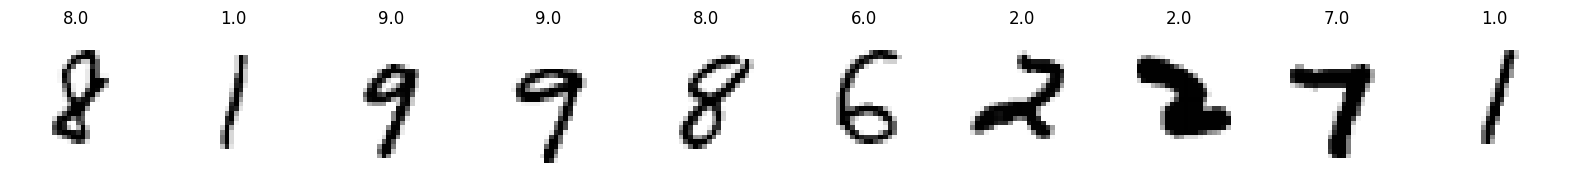

In [46]:
def load_train_data(input_file = 'input/train.csv'):
	data = np.loadtxt(input_file, delimiter=',', skiprows=1)
	X = data[:, 1:]
	y = data[:, 0]
	return X, y

def load_test_data(input_file = 'input/test.csv'):
	data = np.loadtxt(input_file, delimiter=',', skiprows=1)
	return data

X_train, y_train = load_train_data()
#shuffle the data
np.random.seed(42)
shuffle_index = np.random.permutation(42000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
#split the data into training and validation sets
X_train, y_train, X_val, y_val = X_train[:40000], y_train[:40000], X_train[40000:], y_train[40000:]
X_test = load_test_data()

def plot_digits(X, y, num_digits=10):
	fig, ax = plt.subplots(1, num_digits, figsize=(20, 4))
	for i in range(num_digits):
		ax[i].imshow(X[i].reshape(28, 28), cmap='binary')
		ax[i].set_title(y[i])
		ax[i].axis('off')
	plt.show()

plot_digits(X_train, y_train)


Random Forest Classifier
Train Accuracy: 1.0
Validation Accuracy: 0.9715


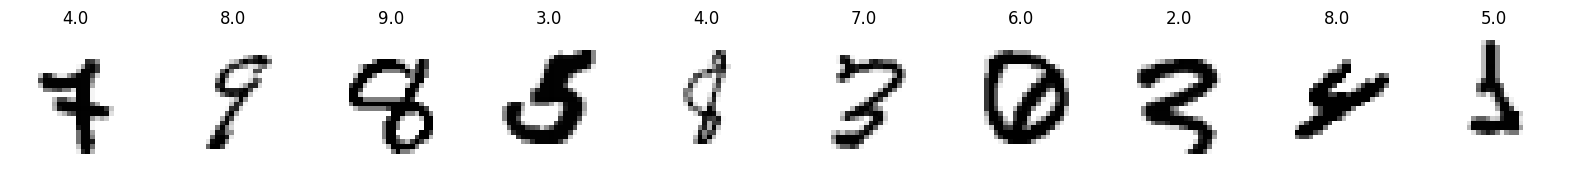

In [55]:
## Machine Learning Models

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


def display_confusion_matrix(y_true, y_pred):
	cm = confusion_matrix(y_true, y_pred)
	disp = ConfusionMatrixDisplay(confusion_matrix=cm)
	disp.plot()
	plt.show()
	
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_train_pred = rf_clf.predict(X_train)
y_val_pred = rf_clf.predict(X_val)
print('Random Forest Classifier')
#print accuracy
print('Train Accuracy:', np.mean(y_train == y_train_pred))
print('Validation Accuracy:', np.mean(y_val == y_val_pred))

# cross_val_score(rf_clf, X_train, y_train, cv=3, scoring='accuracy')

#display those digits that were misclassified
misclassified = X_val[y_val != y_val_pred]
misclassified_labels = y_val[y_val != y_val_pred]
misclassified_pred = y_val_pred[y_val != y_val_pred]

plot_digits(misclassified, misclassified_pred)

In [57]:
y_test = rf_clf.predict(X_test)

#save the predictions to a file
np.savetxt('output/predictions.csv', np.c_[range(1, len(y_test)+1), y_test], delimiter=',', header='ImageId,Label', comments='', fmt='%d')